In [2]:
import pandas as pd
import numpy as np

In [3]:
train_data = pd.read_csv("train_ctrUa4K.csv")
test_data = pd.read_csv("test_lAUu6dG.csv")
test_or = test_data
#train_data.info()
#test_data.info()
train_data.shape
test_data.shape

(367, 12)

In [4]:
# As Loan ID helps in no way to approve or deny a loan application
train_data = train_data.drop('Loan_ID', axis = 1)
test_data = test_data.drop('Loan_ID', axis = 1)
#training_features = train_data.columns[:-1]
#training_data = train_data.loc[:,training_features]
#training_labels = train_data.loc[:,"Loan_Status"]
#print(training_features)
#test_data.columns

Y    422
N    192
Name: Loan_Status, dtype: int64
Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64


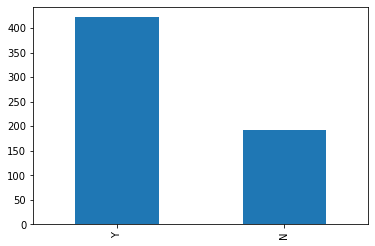

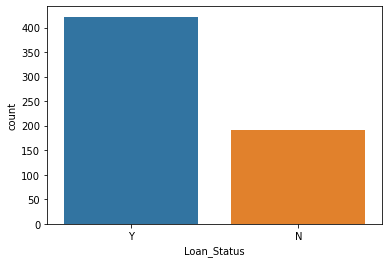

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
print(train_data['Loan_Status'].value_counts())
print(train_data['Loan_Status'].value_counts(normalize=True))
train_data['Loan_Status'].value_counts().plot.bar()
plt.show()
countplot = sns.countplot(train_data['Loan_Status'])

In [7]:
train_data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

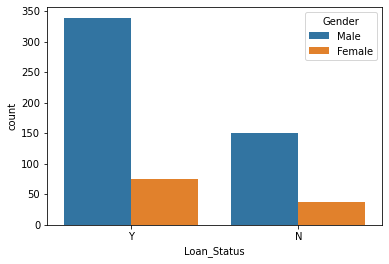

In [287]:
sns.countplot(x='Loan_Status', hue = 'Gender', data = train_data)

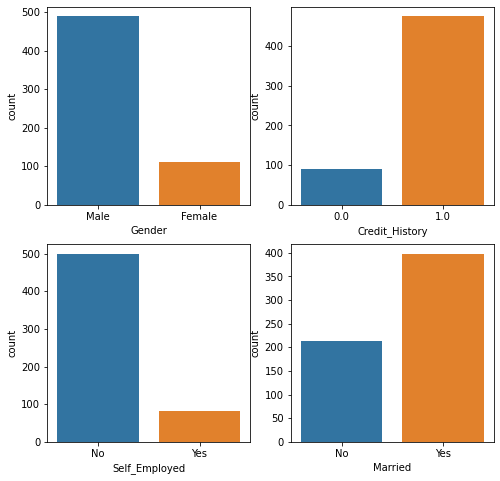

In [288]:
###Binary class categorical variables
f, axes = plt.subplots(2, 2, figsize=(8, 8))
sns.countplot(x = 'Gender', ax = axes[0, 0], data = train_data)
sns.countplot(x = 'Credit_History', ax = axes[0, 1], data = train_data)
sns.countplot(x = 'Self_Employed', ax = axes[1, 0], data = train_data)
sns.countplot(x = 'Married', ax = axes[1, 1], data = train_data)

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


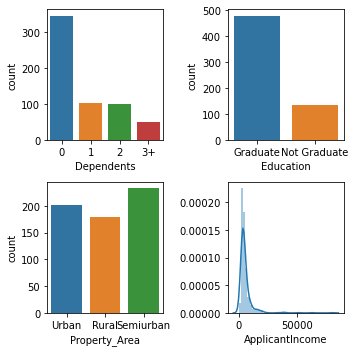

In [289]:
###Multi-class categorical variables
f, axes = plt.subplots(2,2, figsize = (5,5))
print(train_data['Dependents'].value_counts())
print(train_data['Education'].value_counts())
print(train_data['Property_Area'].value_counts())
sns.countplot(x = 'Dependents', ax = axes[0, 0], data = train_data)
sns.countplot(x = 'Education', ax = axes[0, 1], data = train_data)
sns.countplot(x = 'Property_Area', ax = axes[1,0 ], data = train_data)
sns.distplot(train_data['ApplicantIncome'], ax = axes[1,1])
plt.tight_layout()

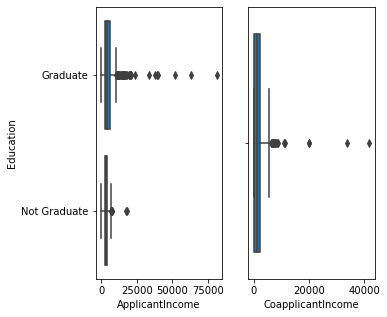

In [290]:
###Continuous Value Variable
f, axes = plt.subplots(1, 2, figsize=(5, 5))
sns.boxplot(x = 'ApplicantIncome', y = 'Education', ax = axes[0], data = train_data)
sns.boxplot(x = 'CoapplicantIncome', ax = axes[1], data = train_data)
plt.show()
#sns.boxplot(x = 'ApplicantIncome', y = 'Gender', hue = 'Married',data = train_data)
#Lot of Outliers

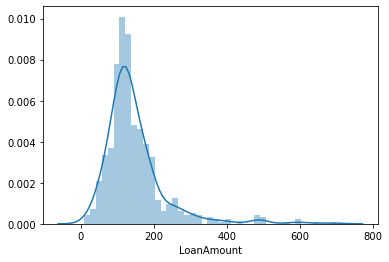

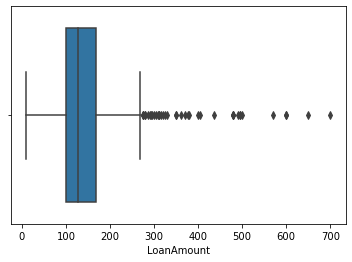

In [291]:
d = sns.distplot(train_data['LoanAmount'])
plt.show()
b = sns.boxplot(train_data['LoanAmount'])

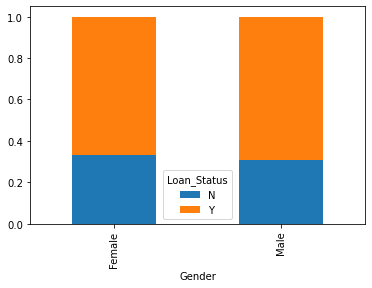

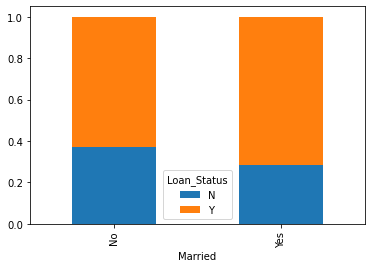

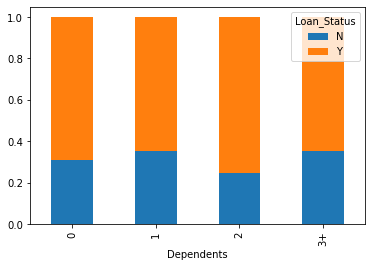

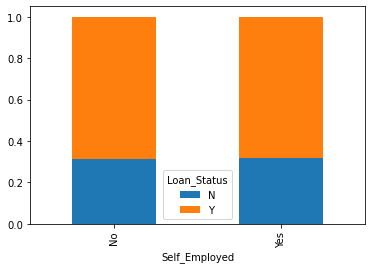

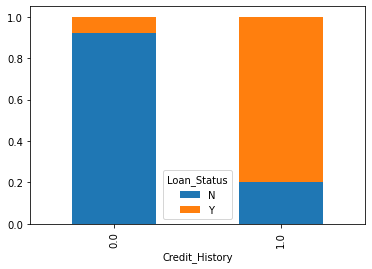

In [292]:
Gend = pd.crosstab(train_data['Gender'], train_data['Loan_Status'])
Gend.div(Gend.sum(1).astype(float), axis = 0).plot.bar(stacked = True)  ###NEED TO LEARN MORE ABOUT THIS FUNCTION
Marr = pd.crosstab(train_data['Married'], train_data['Loan_Status'])
Marr.div(Marr.sum(1).astype(float), axis = 0).plot.bar(stacked = True)
Deps = pd.crosstab(train_data['Dependents'], train_data['Loan_Status'])
Deps.div(Deps.sum(1).astype(float), axis = 0).plot.bar(stacked = True)
SelfE = pd.crosstab(train_data['Self_Employed'], train_data['Loan_Status'])
SelfE.div(SelfE.sum(1).astype(float), axis = 0).plot.bar(stacked = True)

CreditH = pd.crosstab(train_data['Credit_History'], train_data['Loan_Status'])
CreditH.div(CreditH.sum(1).astype(float), axis = 0).plot.bar(stacked = True)

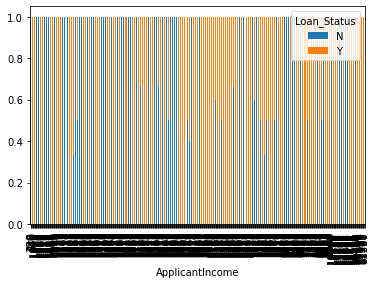

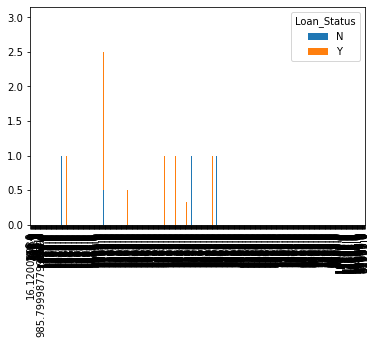

In [8]:
AppInc = pd.crosstab(train_data['ApplicantIncome'], train_data['Loan_Status'])
AppInc.div(AppInc.sum(1).astype(float), axis = 0).plot.bar(stacked = True)
CoappInc = pd.crosstab(train_data['CoapplicantIncome'], train_data['Loan_Status'])
CoappInc.div(AppInc.sum(1).astype(float), axis = 0).plot.bar(stacked = True)
plt.show()

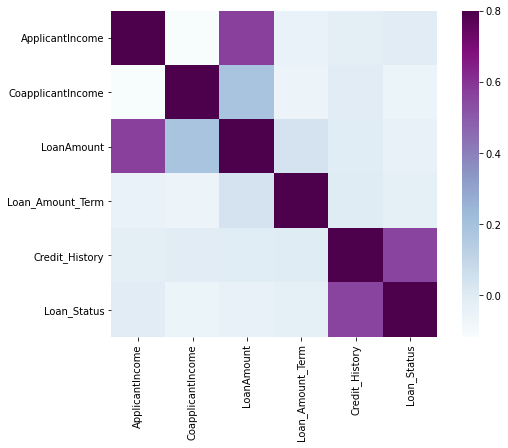

In [9]:
train_data['Loan_Status'].replace('Y', 1, inplace = True)
train_data['Dependents'].replace('3+', 3, inplace = True)
train_data['Loan_Status'].replace('N', 0, inplace = True)
matrix = train_data.corr()
plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax = 0.8, square = True, cmap = "BuPu")

## Correlation exists between LoanAmount and ApplicantIncome
## Between Loan_Status and Credit_History
## Some degree between LoanAmount and CoapplicantIncome

In [219]:
train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace =True)
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace =True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace =True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace =True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace =True)
#train_data['Loan_Amount_Term'].value_counts()
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace =True)

## As Loan Amount has a lot of outliers as seen from the graph above, we cannot replace with the mean which is influenced highly by the outliers. Instead we will impute with median

In [220]:
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace = True)

In [221]:
##Doing the same for test set
test_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace =True)
test_data['Married'].fillna(train_data['Married'].mode()[0], inplace =True)
test_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace =True)
test_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace =True)
test_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace =True)
test_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace =True)
test_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace = True)

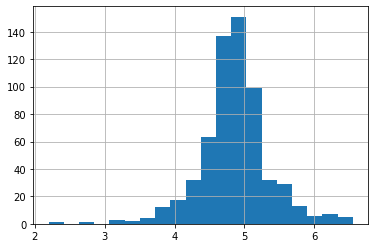

In [222]:
##Outlier Treatments - Log transformation is the way to go!

train_data['LoanAmount_logged'] = np.log(train_data['LoanAmount'])
train_data['LoanAmount_logged'].hist(bins=20)
test_data['LoanAmount_logged'] = np.log(test_data['LoanAmount'])

In [11]:
X = train_data.drop('Loan_Status',axis = 1)
y = train_data.Loan_Status
#y.head()

In [12]:
#Converting categorical values into numerical ones
X = pd.get_dummies(X)
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.3)

In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression as LR
i = 1
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)
for train_index, test_index in kf.split(X, y):
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y.loc[train_index], y.loc[test_index]
model = LR(random_state = 1)
model.fit(xtr, ytr)
pred = model.predict(xvl)
print(accuracy_score(pred, yvl))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

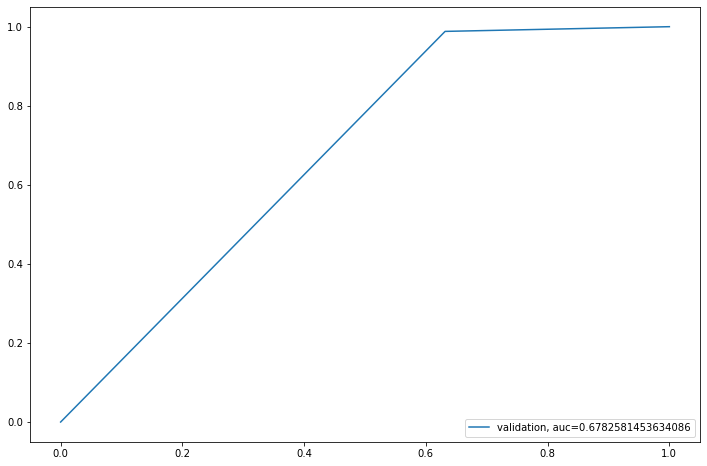

In [282]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize = (12,8))
plt.plot(fpr, tpr, label = "validation, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
submission = pd.read_csv("sample_submission_49d68Cx.csv")
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_or['Loan_ID']
submission['Loan_Status'].replace(1, 'Y', inplace=True)
submission['Loan_Status'].replace(0, 'N', inplace=True)

pd.DataFrame(submission, columns = ['Loan_ID', 'Loan_Status']).to_csv('logistic.csv', index = False)